In [1]:
library(ArchR)
library(here)
library(Seurat)
library(SeuratDisk)
library(SingleCellExperiment)
options(repr.plot.width=15, repr.plot.height=11)
## add general functions at the top of the R scripts
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
#archr settings
addArchRGenome("hg38")
addArchRThreads(threads = 8) 

Setting default genome to Hg38.

Input threads is equal to or greater than ncores minus 1 (7)
Setting cores to ncores minus 2. Set force = TRUE to set above this number!

Setting default number of Parallel threads to 6.



In [3]:
PROJNAME = "BICCN_human_Str_snATAC_MSN"
PROJPATH = here(here("data/tidy_data/ArchRProjects"),PROJNAME) #subset proj name
PROJPATH
proj = loadArchRProject(PROJPATH)

[1] "/projects/pfenninggroup/singleCell/BICCN_human_CATlas_snATAC-seq/data/tidy_data/ArchRProjects/BICCN_human_Str_snATAC_MSN"

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-7b617280b29e-Date-2024-03-25_Time-21-10-25.990753.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-7b617280b29e-Date-2024-03-25_Time-21-10-25.990753.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


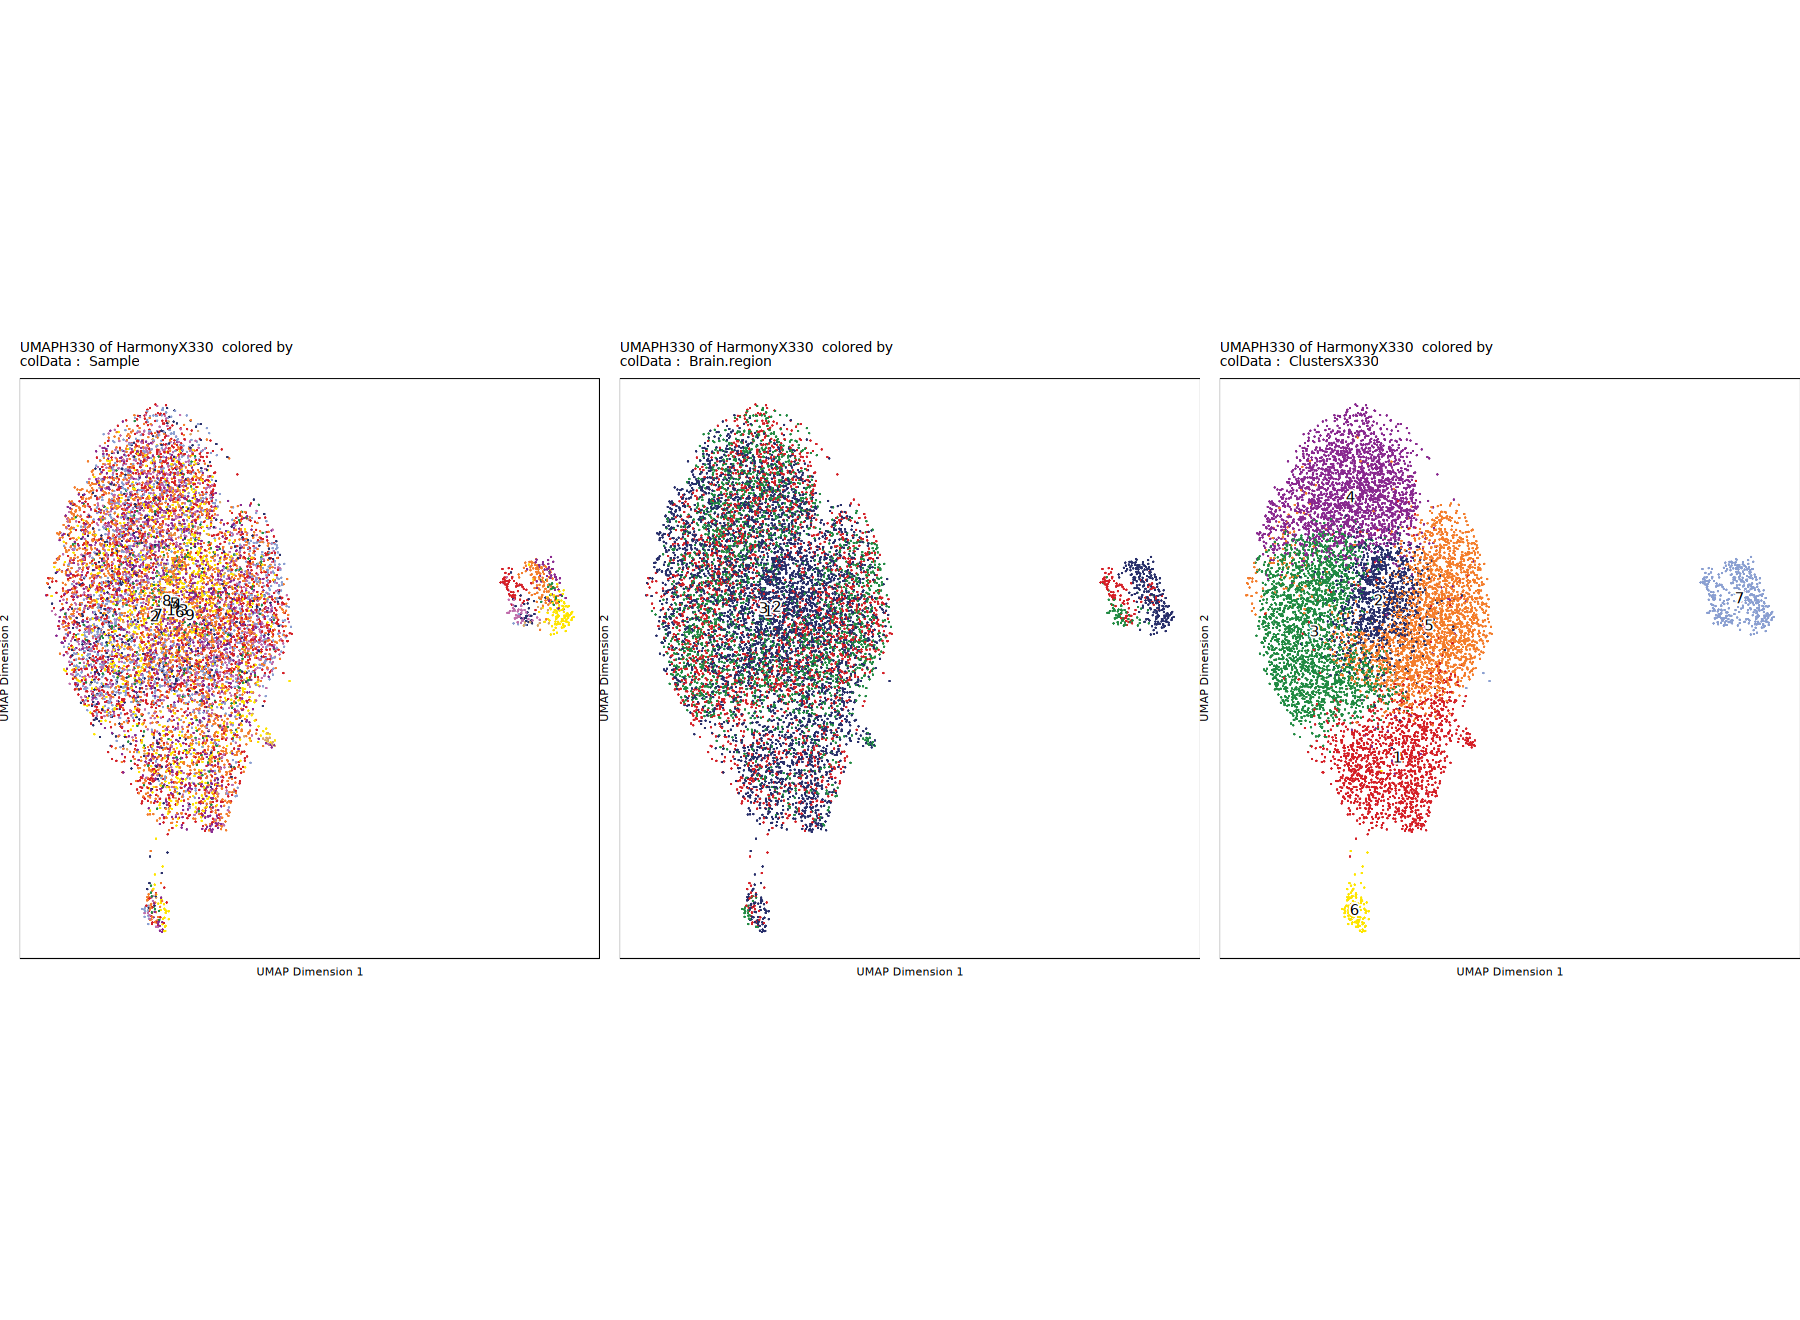

In [4]:
p <- plotEmbedding( ArchRProj = proj, colorBy = "cellColData", name = c('Sample', 'Brain.region', 'ClustersX330'), embedding = "UMAPH330") 
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
          axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-7b611fb81d92-Date-2024-03-25_Time-21-10-40.765829.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-25 21:10:41.427722 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-7b611fb81d92-Date-2024-03-25_Time-21-10-40.765829.log



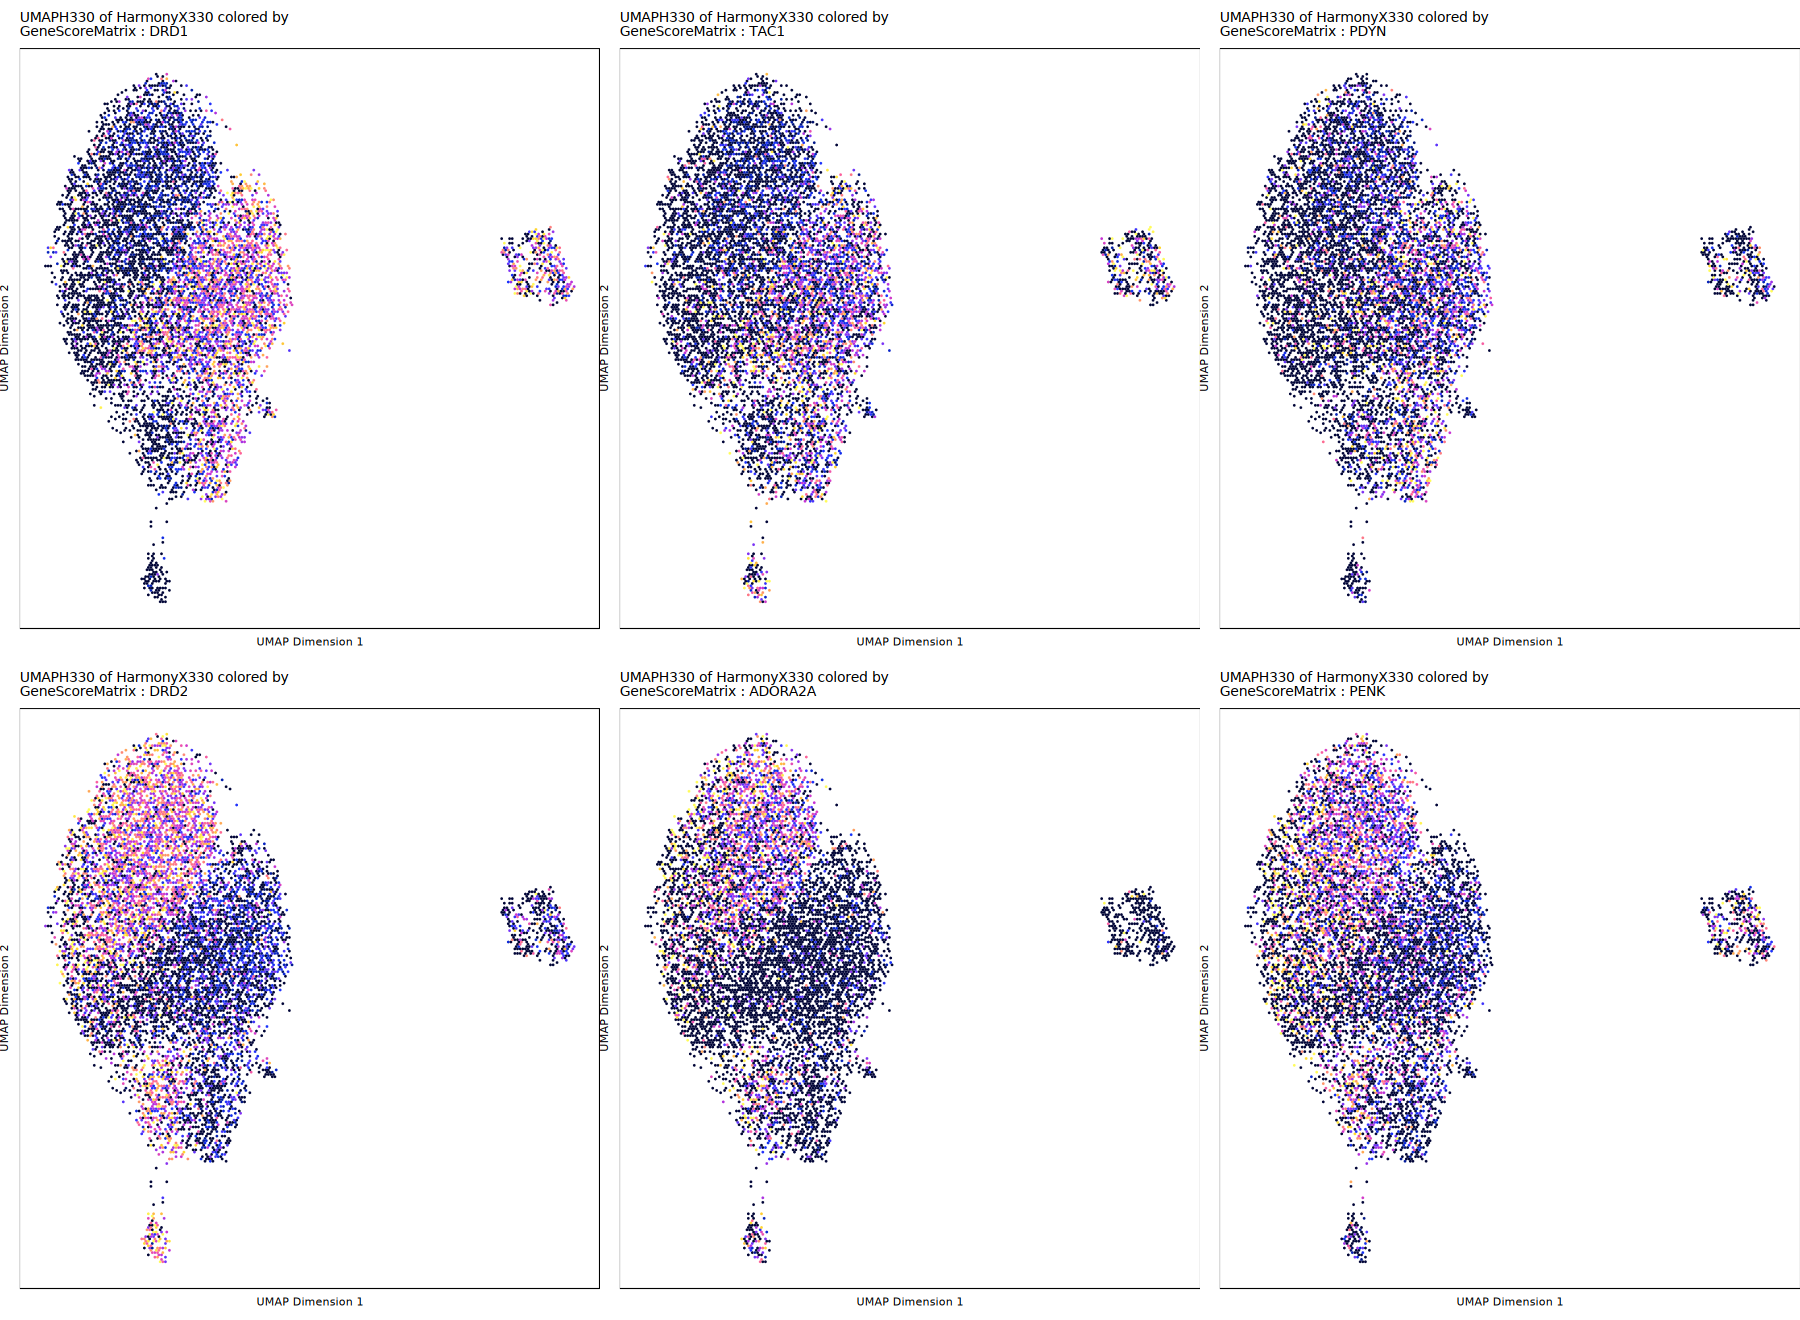

In [5]:
markMSN1 = c('DRD1','TAC1', 'PDYN', 'DRD2','ADORA2A','PENK') # D1 & D2 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAPH330", imputeWeights = NULL) # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-7b61c40db78-Date-2024-03-25_Time-21-11-05.174157.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-25 21:11:05.919408 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-7b61c40db78-Date-2024-03-25_Time-21-11-05.174157.log



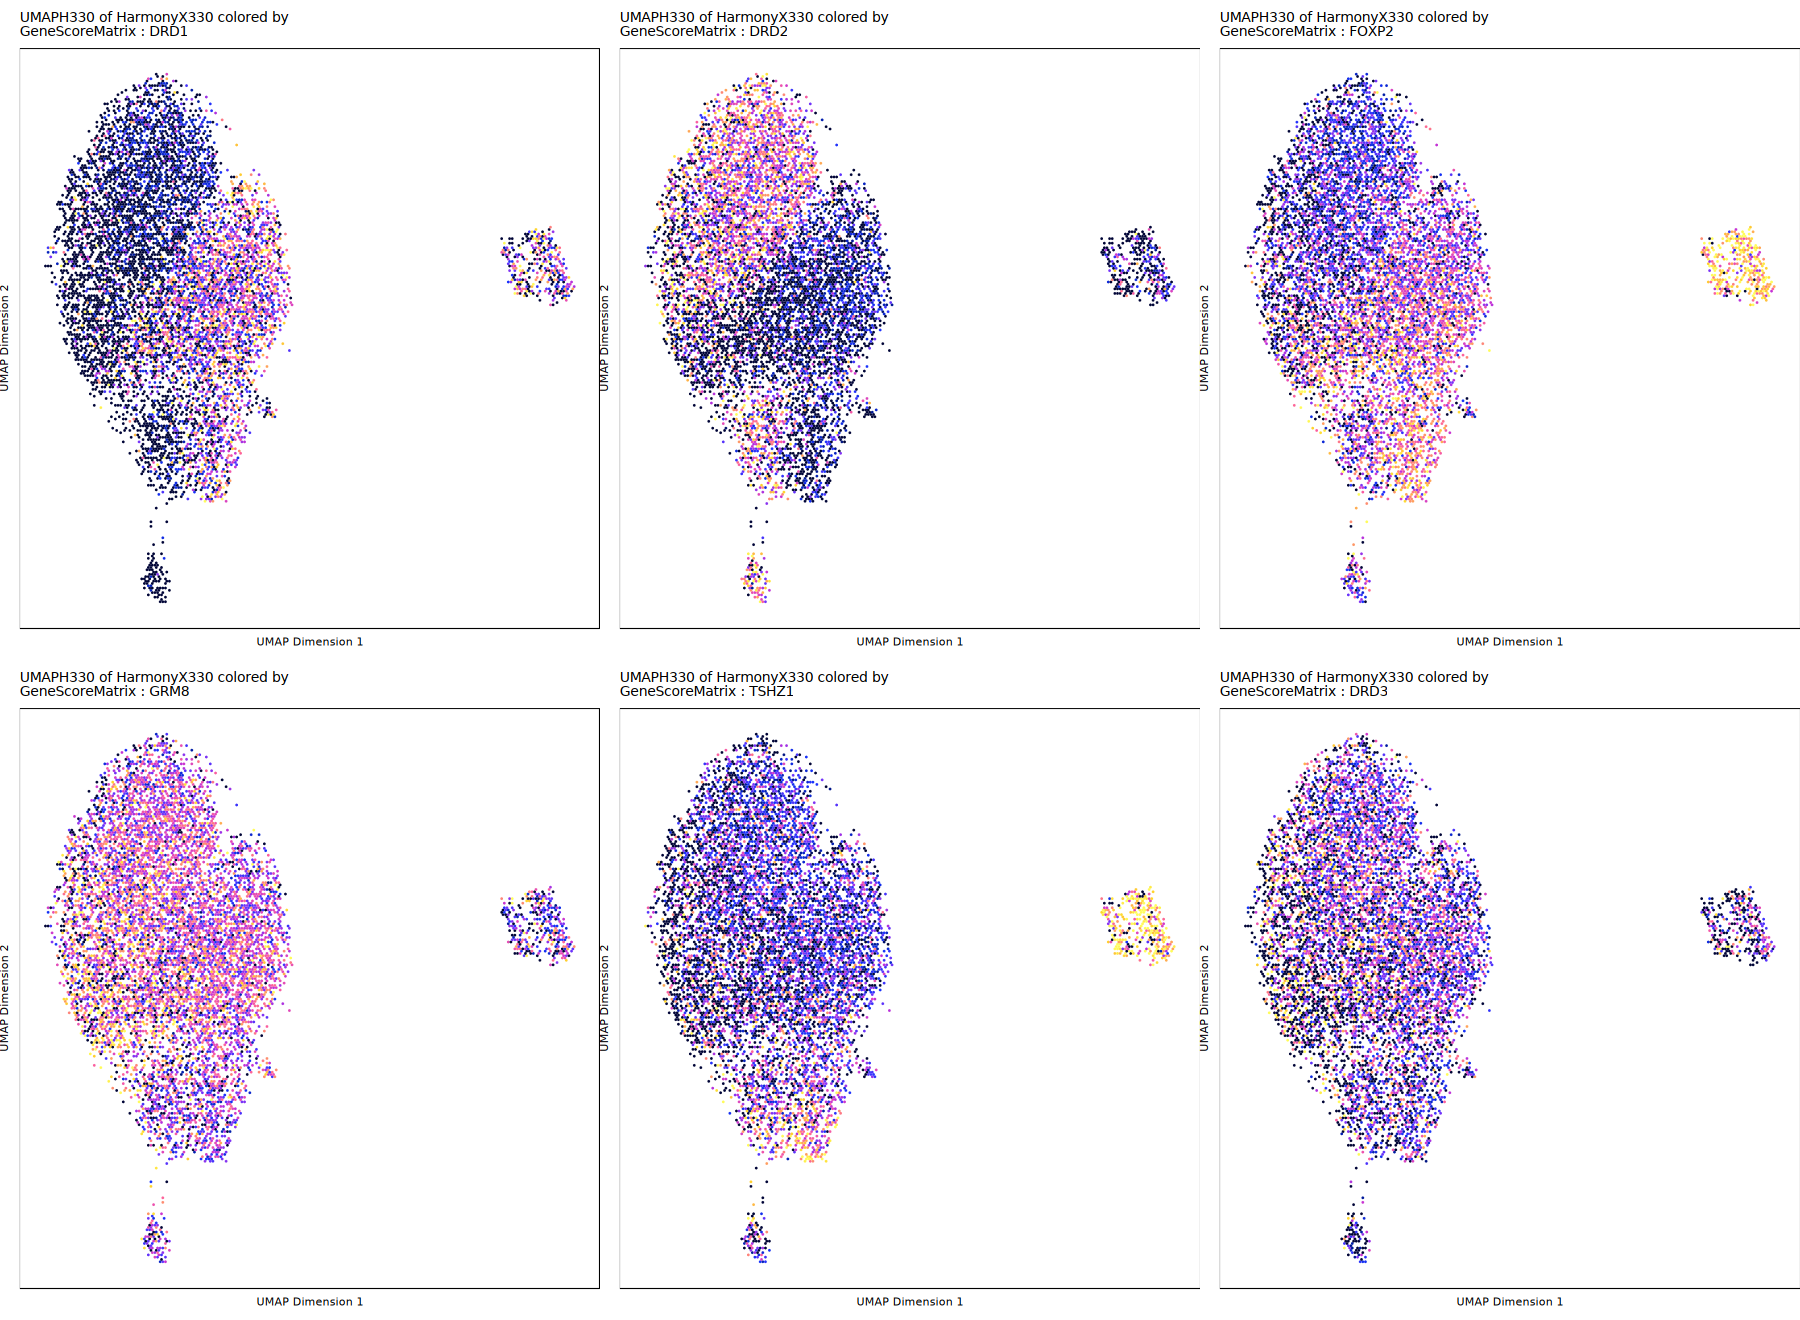

In [6]:
markMSN2 = c('DRD1', 'DRD2', 'FOXP2', 'GRM8','TSHZ1', 'DRD3')# eSPN, D1/D2, IC markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAPH330", imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [ ]:
## make the plots
cols1 = setNames(RColorBrewer::brewer.pal(8,'Paired')[c(2,4,6,8)], c('D1', 'eSPN', 'D2', 'IC'))

cols2 = setNames(RColorBrewer::brewer.pal(7,'Paired'), 
                c('D1-Matrix', 'D1-Striosome', 'D1-NUDAP',  'D1/D2H', 'D2-Matrix', 'D2-Striosome', 'IC'))

cols = c(cols1, cols2)

p <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                   name = c('integrated_clusters', 'integrated_subclusters'), 
                   embedding = "UMAPH330", pal = cols) 

       
p2 <- lapply(p, function(x){
  x + theme_ArchR(baseSize = 12) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank(), 
            legend.text=element_text(size= 12)) + 
    guides(color = guide_legend(override.aes = list(size=5)))
})
do.call(cowplot::plot_grid, c(list(ncol = 2),p2))

In [ ]:
markerGenes  <- c( "Drd1", "Drd2", "Drd3", "Foxp2", 'Tshz1')

p <- plotBrowserTrack( 
    ArchRProj = proj, groupBy = "integrated_clusters", geneSymbol = markerGenes, pal = cols,
    upstream = 500000, downstream = 500000)

In [ ]:
options(repr.plot.width=15, repr.plot.height=6)
grid::grid.draw(p$Drd1)

In [ ]:
grid::grid.draw(p$Drd2)

In [ ]:
grid::grid.draw(p$Drd3)

In [ ]:
grid::grid.draw(p$Foxp2)

In [ ]:
grid::grid.draw(p$Tshz1)